<a href="https://colab.research.google.com/github/NaufalYogaPratama/BMLP-bank-transactions-data-model/blob/main/%5BClustering%5D_Submission_Akhir__Naufal_Yoga_Pratama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import joblib

pd.set_option('display.max_columns', None)
print("Semua library berhasil di-import!")

Semua library berhasil di-import!


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [4]:
# Load data

url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [5]:
# Tampilkan 5 baris pertama dengan function head.

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [6]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [7]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

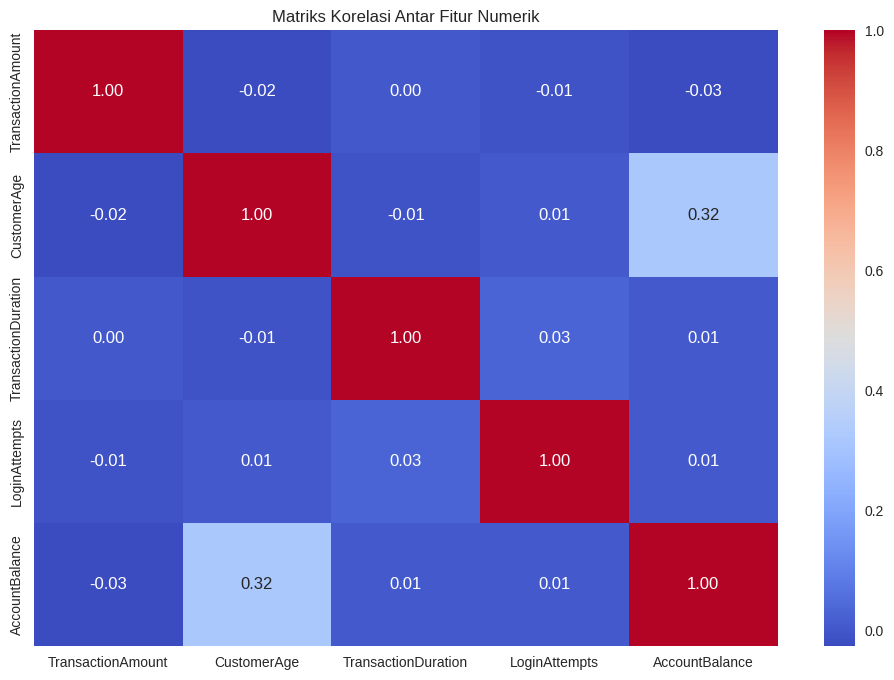

In [9]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()

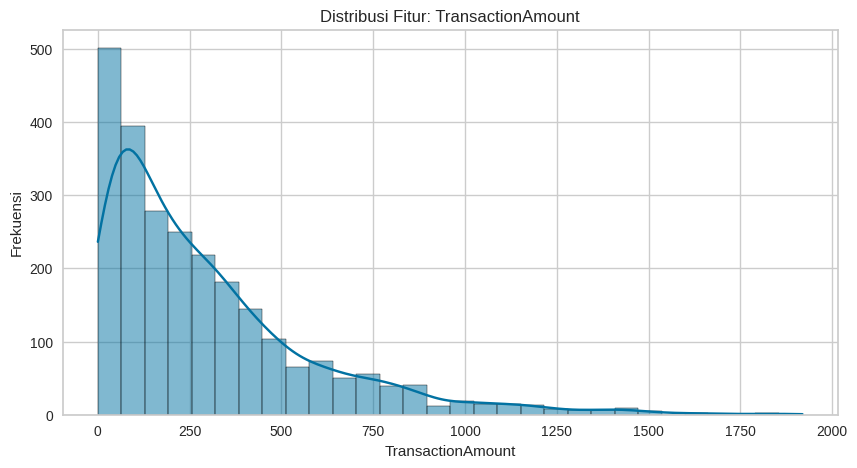

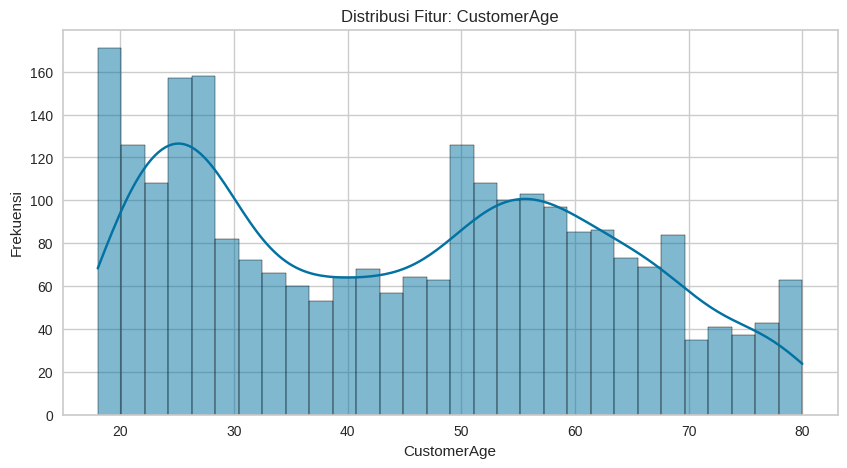

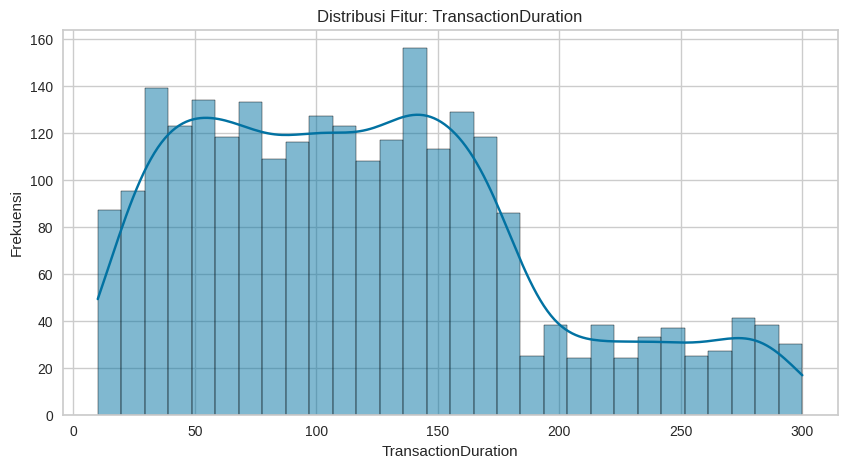

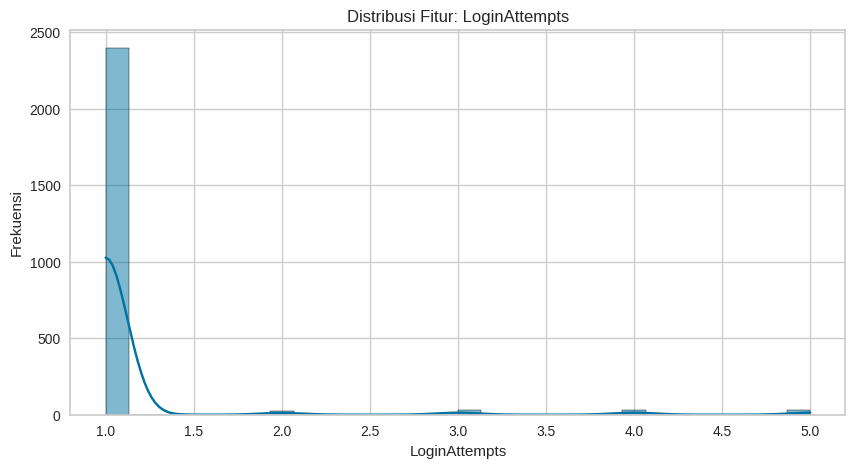

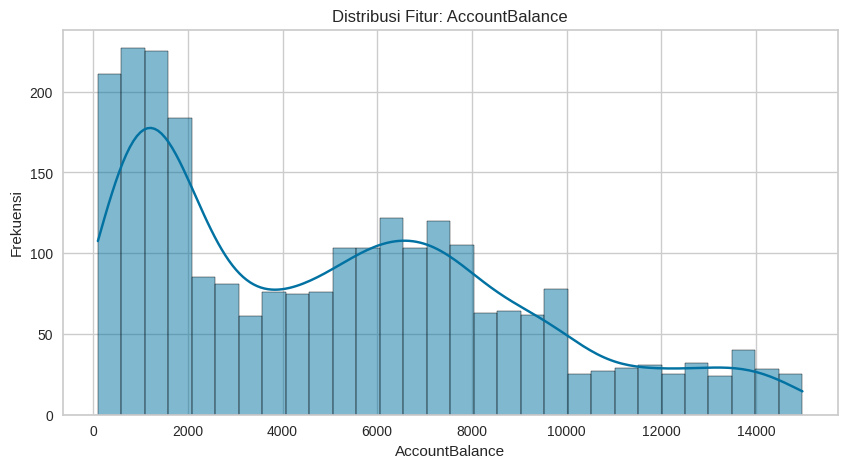

In [11]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

numeric_columns = df.select_dtypes(include=np.number).columns

for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi Fitur: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

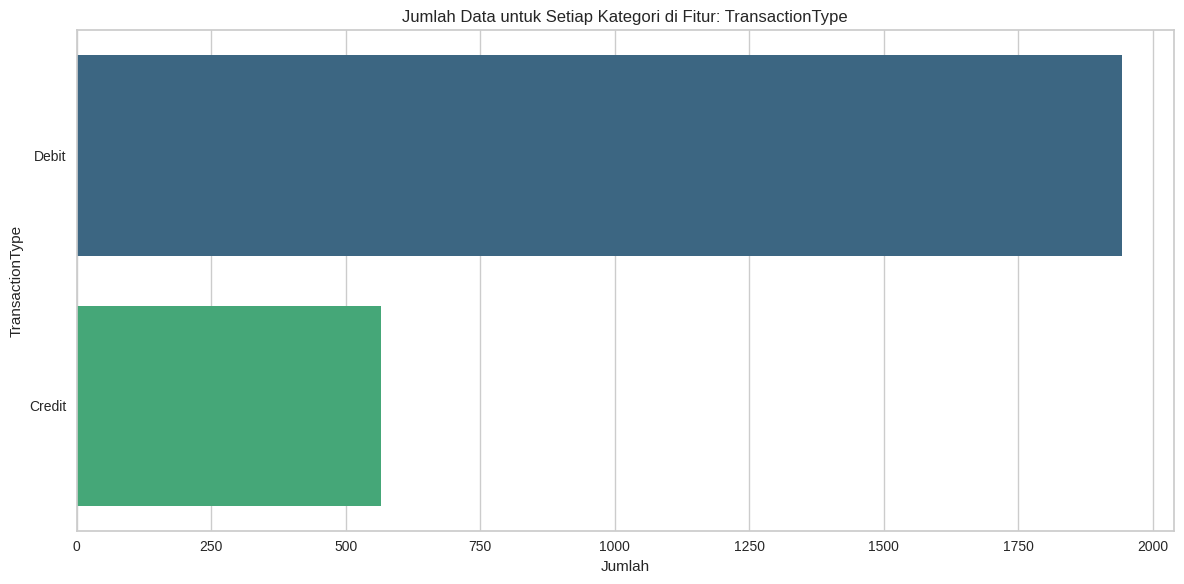

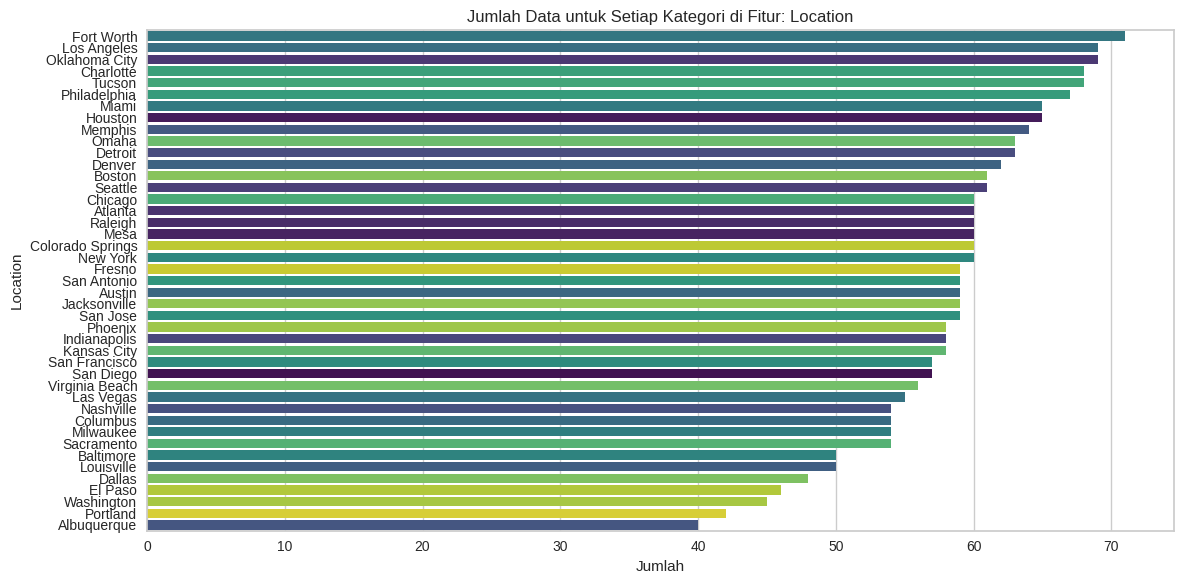

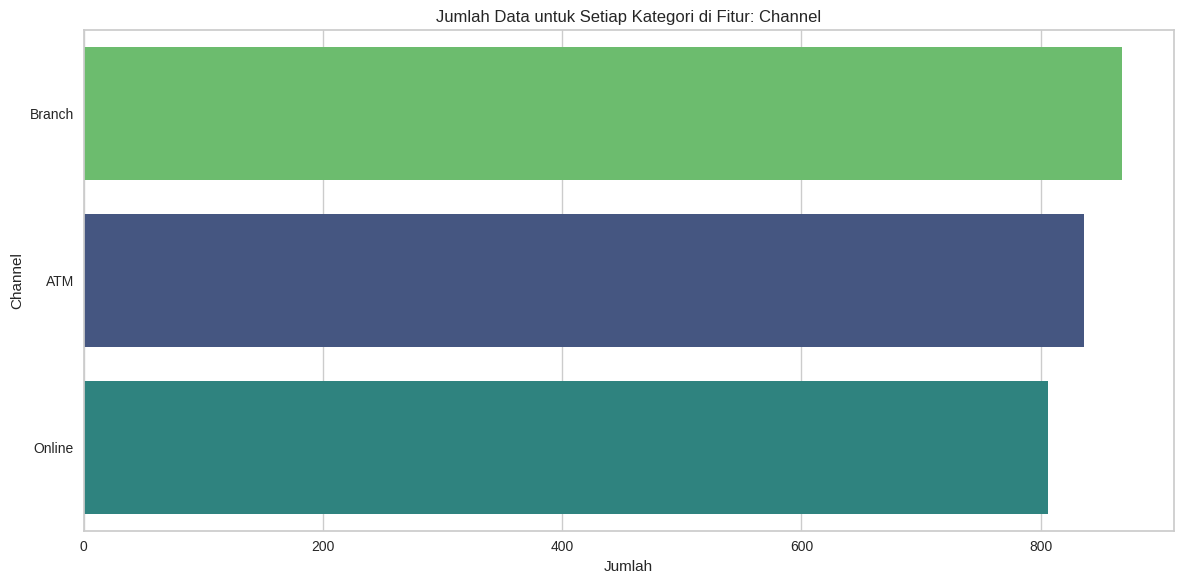

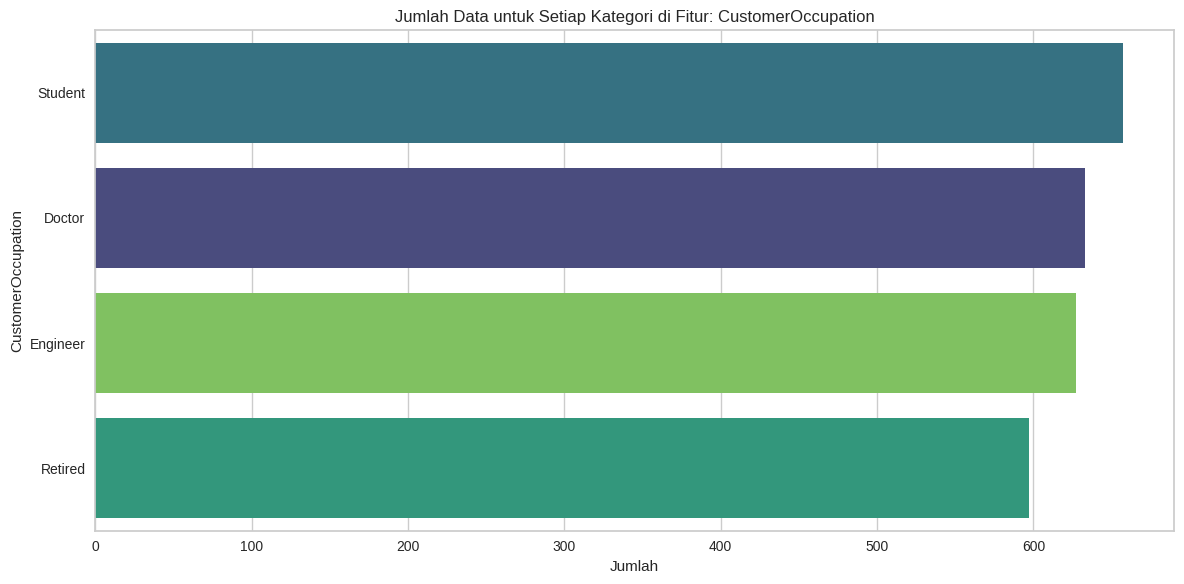

In [20]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    if df[col].nunique() > 50:
        continue

    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[col],
                  order=df[col].value_counts().index,
                  palette='viridis',
                  hue=df[col],
                  legend=False)

    plt.title(f'Jumlah Data untuk Setiap Kategori di Fitur: {col}')
    plt.xlabel('Jumlah')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [23]:
df_processed = df.copy()

# Mengecek dataset menggunakan isnull().sum()

print("Jumlah nilai null di setiap kolom:")
df_processed.isnull().sum()

Jumlah nilai null di setiap kolom:


,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [27]:
# Mengecek dataset menggunakan duplicated().sum()

print("Jumlah baris data yang terduplikasi:")
df_processed.duplicated().sum()

Jumlah baris data yang terduplikasi:


np.int64(21)

In [26]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

numeric_columns = df_processed.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()

df_processed[numeric_columns] = scaler.fit_transform(df_processed[numeric_columns])

print("Data setelah feature scaling (5 baris pertama):")
df_processed.head()

Data setelah feature scaling (5 baris pertama):


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [29]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

id_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']

df_processed.drop(columns=id_columns, inplace=True, errors='ignore')

print("Kolom ID berhasil dihapus.")
df_processed.head()

Kolom ID berhasil dihapus.


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [37]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

from sklearn.preprocessing import LabelEncoder

categorical_columns = df_processed.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

print("Data setelah feature encoding (5 baris pertama):")
df_processed.head()

Data setelah feature encoding (5 baris pertama):


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmountBin,TransactionAmountBin_Encoded
0,0.007207,680.0,1.0,36.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,105.0,Sangat Rendah,1
1,0.195940,1178.0,1.0,15.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,192.0,Sangat Rendah,1
2,0.065680,1262.0,1.0,23.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,41.0,Sangat Rendah,1
3,0.096016,818.0,1.0,33.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,163.0,Sangat Rendah,1
5,0.047888,635.0,1.0,28.0,0.0,0.000000,3.0,0.558621,0.0,0.045738,13.0,Sangat Rendah,1


In [31]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

print("Daftar kolom yang tersisa di dalam dataset:")
df_processed.columns.tolist()

Daftar kolom yang tersisa di dalam dataset:


['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [32]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

print(f"Bentuk data sebelum menangani nilai hilang: {df_processed.shape}")
df_processed.dropna(inplace=True)
print(f"Bentuk data setelah menangani nilai hilang: {df_processed.shape}")

Bentuk data sebelum menangani nilai hilang: (2537, 11)
Bentuk data setelah menangani nilai hilang: (2420, 11)


In [33]:
# Menghapus data duplikat menggunakan drop_duplicates().

print(f"Bentuk data sebelum menghapus duplikat: {df_processed.shape}")
df_processed.drop_duplicates(inplace=True)
print(f"Bentuk data setelah menghapus duplikat: {df_processed.shape}")

Bentuk data sebelum menghapus duplikat: (2420, 11)
Bentuk data setelah menghapus duplikat: (2398, 11)


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [34]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

print("Melakukan penanganan outlier dengan metode IQR (Capping)...")
numeric_columns_after_drop = df_processed.select_dtypes(include=np.number).columns

for col in numeric_columns_after_drop:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
    df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])

print("Penanganan outlier selesai.")
df_processed.describe()

Melakukan penanganan outlier dengan metode IQR (Capping)...
Penanganan outlier selesai.


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2398.000000,2398.000000,2398.0,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.0,2398.000000,2398.000000
mean,0.148038,1256.404921,1.0,21.383653,1.013344,0.429323,1.532110,0.377521,0.0,0.335330,180.984987
std,0.130359,726.716182,0.0,12.417622,0.831075,0.287681,1.153802,0.242365,0.0,0.262236,103.757245
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.042624,626.250000,1.0,11.000000,0.000000,0.145161,0.000000,0.182759,0.0,0.093288,92.000000
50%,0.110829,1254.500000,1.0,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,0.308010,181.000000
75%,0.214235,1884.750000,1.0,32.000000,2.000000,0.661290,3.000000,0.524138,0.0,0.507822,271.750000
max,0.471651,2485.000000,1.0,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000


In [35]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

print("Melakukan binning pada fitur 'TransactionAmount'...")

bins = [0, 0.2, 0.4, 0.6, 1.0]
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi']

df_processed['TransactionAmountBin'] = pd.cut(df_processed['TransactionAmount'], bins=bins, labels=labels, include_lowest=True)

le_binned = LabelEncoder()
df_processed['TransactionAmountBin_Encoded'] = le_binned.fit_transform(df_processed['TransactionAmountBin'])

print("\nContoh hasil binning dan encoding (5 baris pertama):")
df_processed[['TransactionAmount', 'TransactionAmountBin', 'TransactionAmountBin_Encoded']].head()

Melakukan binning pada fitur 'TransactionAmount'...

Contoh hasil binning dan encoding (5 baris pertama):


,TransactionAmount,TransactionAmountBin,TransactionAmountBin_Encoded
0,0.007207,Sangat Rendah,1
1,0.195940,Sangat Rendah,1
2,0.065680,Sangat Rendah,1
3,0.096016,Sangat Rendah,1
5,0.047888,Sangat Rendah,1


In [39]:
if 'TransactionAmountBin' in df_processed.columns:
    df_processed.drop(columns=['TransactionAmountBin'], inplace=True)
    print("Kolom non-numerik 'TransactionAmountBin' berhasil dihapus.")
else:
    print("Kolom 'TransactionAmountBin' sudah tidak ada. Data siap untuk di-cluster.")

# Tampilkan 5 baris pertama untuk memastikan
df_processed.head()

Kolom non-numerik 'TransactionAmountBin' berhasil dihapus.


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmountBin_Encoded
0,0.007207,680.0,1.0,36.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,105.0,1
1,0.195940,1178.0,1.0,15.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,192.0,1
2,0.065680,1262.0,1.0,23.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,41.0,1
3,0.096016,818.0,1.0,33.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,163.0,1
5,0.047888,635.0,1.0,28.0,0.0,0.000000,3.0,0.558621,0.0,0.045738,13.0,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [40]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df_processed.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmountBin_Encoded
count,2398.000000,2398.000000,2398.0,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.0,2398.000000,2398.000000,2398.000000
mean,0.148038,1256.404921,1.0,21.383653,1.013344,0.429323,1.532110,0.377521,0.0,0.335330,180.984987,0.878649
std,0.130359,726.716182,0.0,12.417622,0.831075,0.287681,1.153802,0.242365,0.0,0.262236,103.757245,0.508455
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.042624,626.250000,1.0,11.000000,0.000000,0.145161,0.000000,0.182759,0.0,0.093288,92.000000,1.000000
50%,0.110829,1254.500000,1.0,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,0.308010,181.000000,1.000000
75%,0.214235,1884.750000,1.0,32.000000,2.000000,0.661290,3.000000,0.524138,0.0,0.507822,271.750000,1.000000
max,0.471651,2485.000000,1.0,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000,2.000000


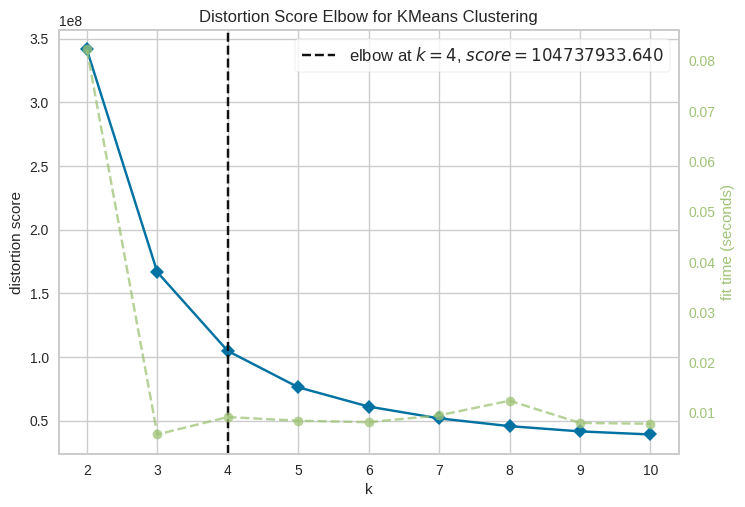

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

model = KMeans(random_state=42, n_init='auto')
visualizer = KElbowVisualizer(model, k=(2, 11))

visualizer.fit(df_processed)
visualizer.show()

In [42]:
# Menggunakan algoritma K-Means Clustering

best_k = visualizer.elbow_value_
print(f"Jumlah cluster (K) yang optimal adalah: {best_k}")

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
kmeans.fit(df_processed)

df_processed['Cluster'] = kmeans.labels_
print("\nModel K-Means berhasil dilatih dan label cluster telah ditambahkan.")
df_processed.head()

Jumlah cluster (K) yang optimal adalah: 4

Model K-Means berhasil dilatih dan label cluster telah ditambahkan.


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmountBin_Encoded,Cluster
0,0.007207,680.0,1.0,36.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,105.0,1,3
1,0.195940,1178.0,1.0,15.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,192.0,1,3
2,0.065680,1262.0,1.0,23.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,41.0,1,2
3,0.096016,818.0,1.0,33.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,163.0,1,3
5,0.047888,635.0,1.0,28.0,0.0,0.000000,3.0,0.558621,0.0,0.045738,13.0,1,3


Jalankan cell code ini untuk menyimpan model kamu.

In [43]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

joblib.dump(kmeans, "model_clustering.h5")
print("\nModel berhasil disimpan sebagai 'model_clustering.h5'")


Model berhasil disimpan sebagai 'model_clustering.h5'


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [44]:
# Menghitung dan menampilkan nilai Silhouette Score.

score = silhouette_score(df_processed.drop('Cluster', axis=1), df_processed['Cluster'])
print(f"Nilai Silhouette Score adalah: {score:.4f}")

Nilai Silhouette Score adalah: 0.4995


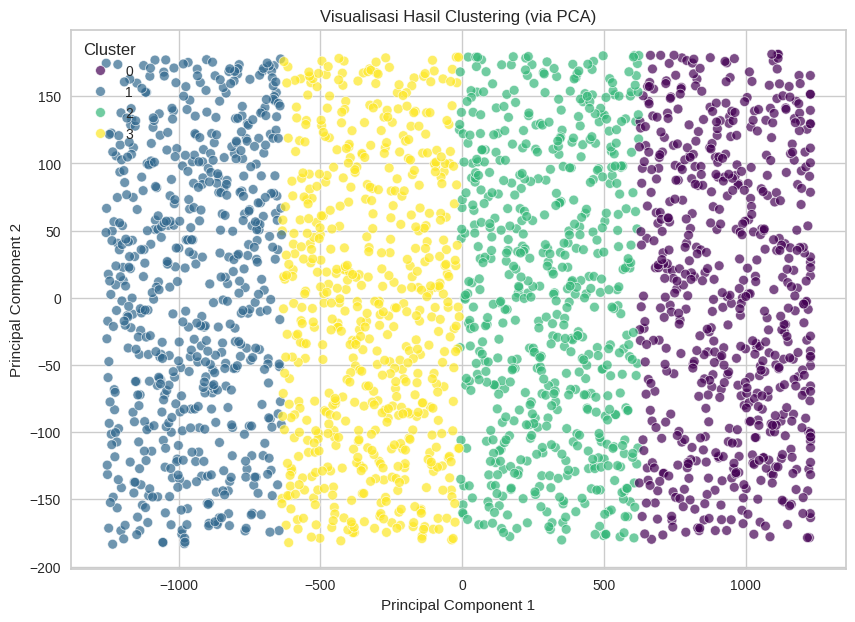

In [45]:
# Membuat visualisasi hasil clustering

pca_viz = PCA(n_components=2)
df_pca_viz = pca_viz.fit_transform(df_processed.drop('Cluster', axis=1))

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca_viz[:, 0], y=df_pca_viz[:, 1], hue=df_processed['Cluster'], palette='viridis', s=50, alpha=0.7)
plt.title('Visualisasi Hasil Clustering (via PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [46]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_processed.drop('Cluster', axis=1))

data_final = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])

kmeans_pca = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
kmeans_pca.fit(data_final)

print("Model K-Means pada data hasil PCA berhasil dibangun.")

Model K-Means pada data hasil PCA berhasil dibangun.


In [47]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

joblib.dump(pca, "PCA_model_clustering.h5")
print("\nModel PCA berhasil disimpan sebagai 'PCA_model_clustering.h5'")


Model PCA berhasil disimpan sebagai 'PCA_model_clustering.h5'


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [49]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.